IND 320 - NMBU

Project work, part 1 - Dashboard basics

\newpage

## AI usage

I used AI tools to better understand some concepts in Pandas and Streamlit, such as caching with @st.cache_data, handling time indexes with Pandas, and using secondary axes in Matplotlib. They also helped me fix errors in my code, like encoding issues with the degree symbol (°) in the CSV, duplicate columns that blocked the table display, and import problems between files. Finally, I used them to improve my English writing in the README and the project log. The implementation, testing, and final decisions were done only by me.

## Log describing

In this first part of the project, the goal was to build a foundation for a dashboard by following a step-by-step approach, first in a Jupyter Notebook and then in a Streamlit application. The starting point was the provided CSV file with meteorological data. I decided to work in a systematic way: first understand the data, then explore it visually, and finally transfer this logic into an interactive application.

In the Jupyter Notebook, I started by loading the CSV file with Pandas. At first, I had some issues with the encoding, especially with displaying the degree symbol (°). I solved this by using utf-8, which made the columns readable. I then converted the time column into datetime and set it as the time index.

Next, I produced a series of graphs: one separate plot for each numeric variable, which allowed me to detect trends and check that the values looked consistent. To answer the instruction “plot all columns together,” I added a combined graph. Since the variables have very different scales (temperature in °C, precipitation in mm, wind speed in m/s, wind direction in °), I thought about how to make this plot readable. I chose to use a secondary axis for the wind direction. This makes it possible to compare all the variables without the 0–360° range of the direction dominating the others.

Once this logic was validated in the notebook, I reproduced it in Streamlit to build a first version of the dashboard. I organized the app into four pages: a home page, a “Data” page, a “Charts” page, and an “About” page. On the Data page, I used st.dataframe with st.column_config.LineChartColumn to represent the first month of data as mini sparklines, with one row per variable. This directly follows the project instruction and gives a compact and intuitive view. On the Charts page, I implemented a column selector (st.selectbox) and a month selection slider (st.select_slider). The user can choose to display a single variable or all of them together, with the option to put the wind direction on a secondary axis for clarity.

During this work, I also learned to better manage the structure of a project (folders data/, utils/, pages/). I used caching in Streamlit to speed up data loading, and I worked on separating the business logic from the interface to make the application clearer and easier to maintain.

In summary, this first step allowed me to produce a notebook that shows the initial analysis and an interactive Streamlit application that follows the same logic in a structured way.

## Github and Streamlit app links

- Streamlit app: [https://liserochat-ind320-dashboard.streamlit.app
](https://liserochat-ind320-dashboard.streamlit.app)  
- GitHub repository: [https://github.com/lise-dev/liserochat-ind320-dashboard.git](https://github.com/lise-dev/liserochat-ind320-dashboard.git)

\newpage

## CSV Analysis and plots

1. Read the supplied CSV file using Pandas.
2. Print its contents in a relevant way.
3. Plot each column separately.
4. Plot all columns together. Consider how to make this natural, given that the scales are different.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../app/data/open-meteo-subset.csv', encoding='utf-8', sep=',')

2. Print its contents in a relevant way

In [18]:
if 'time' in data.columns:
    data['time'] = pd.to_datetime(data['time'], errors='coerce', utc=True)
    data = data.sort_values('time').reset_index(drop=True)
    data = data.set_index('time')  
else:
    raise KeyError("The 'time' column is missing from the dataset.")

data.head()


,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
time,,,,,
2020-01-01 00:00:00+00:00,-2.2,0.1,9.6,21.3,284
2020-01-01 01:00:00+00:00,-2.2,0.0,10.6,23.0,282
2020-01-01 02:00:00+00:00,-2.3,0.0,11.0,23.5,284
2020-01-01 03:00:00+00:00,-2.3,0.0,10.6,23.3,284
2020-01-01 04:00:00+00:00,-2.7,0.0,10.6,22.8,284


3. Plot each column separately


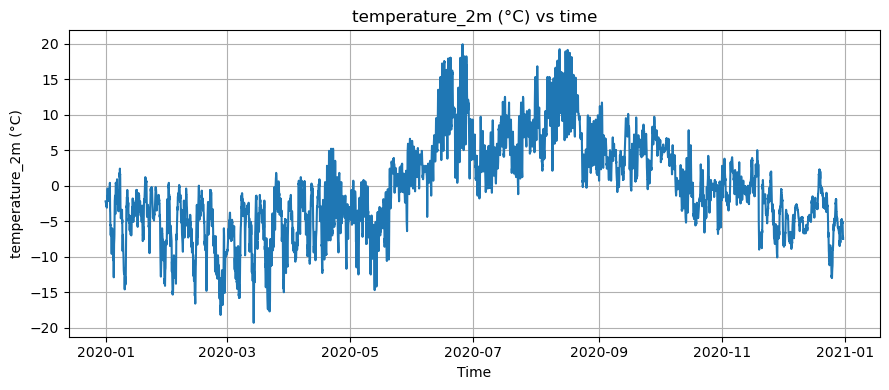

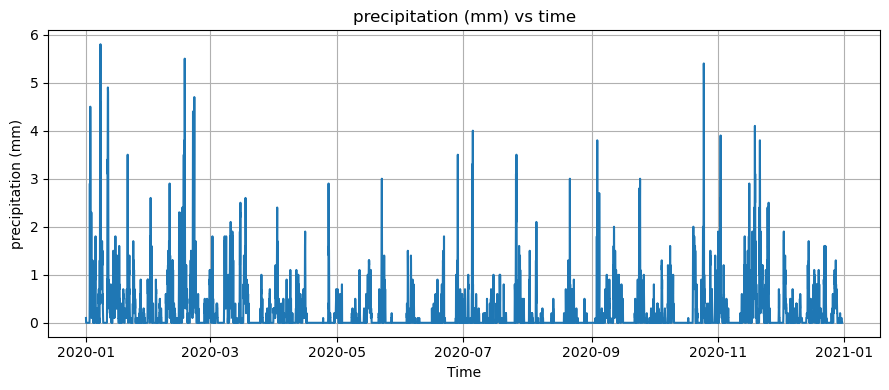

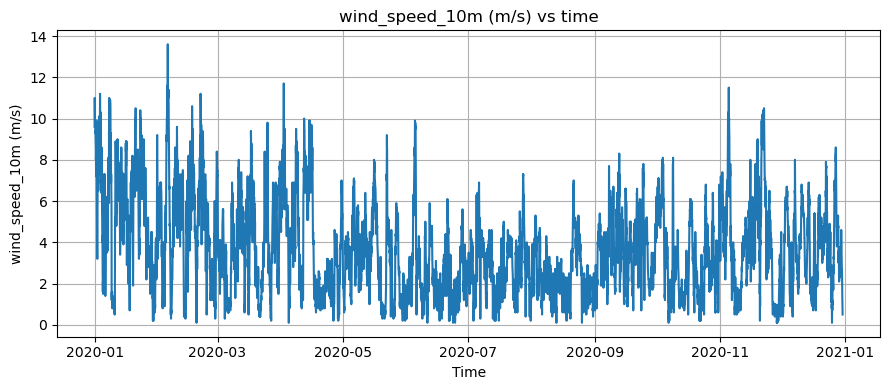

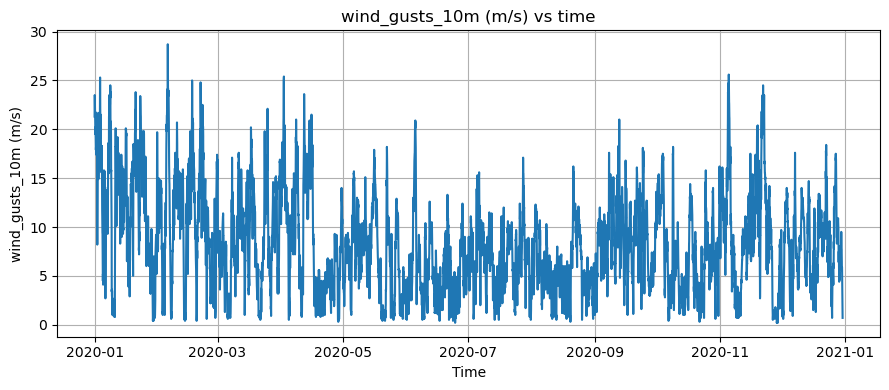

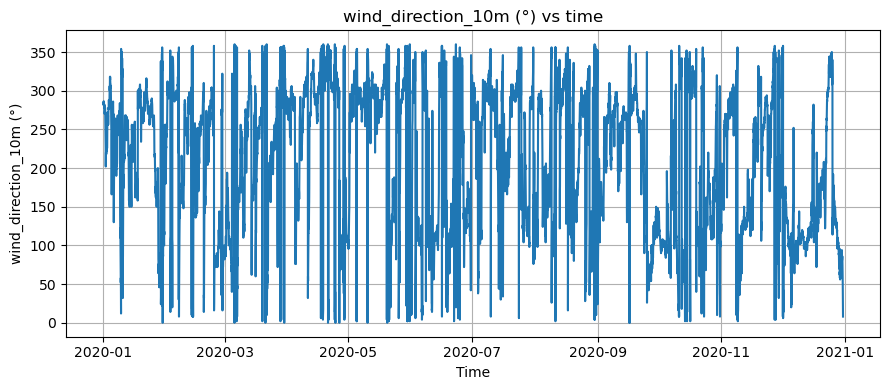

In [19]:
num_cols = data.select_dtypes(include='number').columns

for col in num_cols:
    plt.figure(figsize=(9, 4))
    plt.plot(data.index, data[col])
    plt.title(f'{col} vs time')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()



4. Plot all columns together

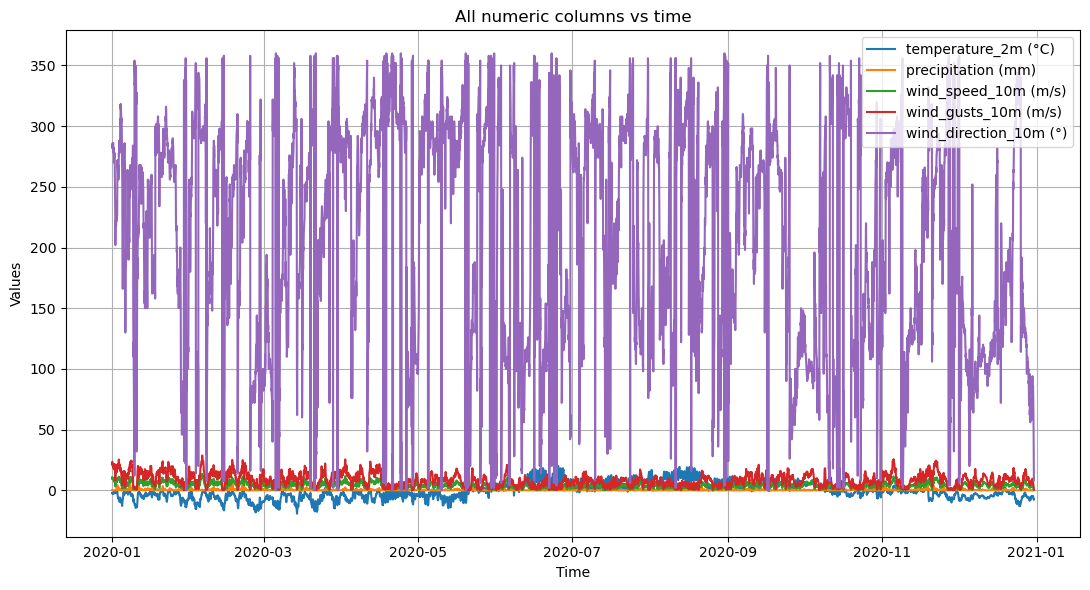

In [20]:
plt.figure(figsize=(11, 6))
for col in num_cols:
    plt.plot(data.index, data[col], label=col)
plt.title('All numeric columns vs time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Put wind direction on the right axis so it does not dominate the other curves.

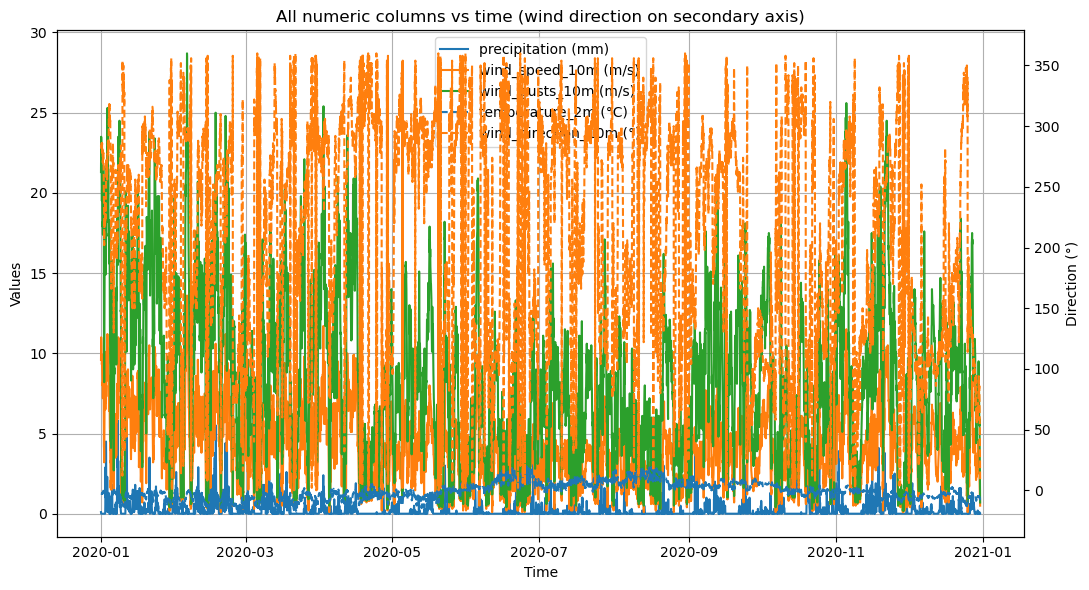

In [21]:
direction_cols = [c for c in num_cols if "direction" in c.lower() or "°" in c.lower()]
primary_cols = [c for c in num_cols if c not in direction_cols]

fig, ax1 = plt.subplots(figsize=(11, 6))
ax2 = ax1.twinx()  

for col in primary_cols:
    ax1.plot(data.index, data[col], label=col)

for col in direction_cols:
    ax2.plot(data.index, data[col], linestyle="--", label=col)

ax1.set_title("All numeric columns vs time (wind direction on secondary axis)")
ax1.set_xlabel("Time")
ax1.set_ylabel("Values")
ax2.set_ylabel("Direction (°)")

ax1.grid(True)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc="best")

plt.tight_layout()
plt.show()
